In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn import metrics


In [2]:
from google.colab import files
uploaded = files.upload()

Saving Salary_Data.csv to Salary_Data.csv


In [3]:
salary_df=pd.read_csv('Salary_Data.csv')
salary_df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [4]:
salary_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [5]:
salary_df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


Text(0.5, 1.0, 'Experiance vs salary')

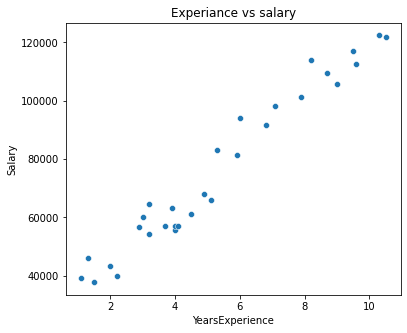

In [6]:
plt.figure(figsize=(6,5))
sns.scatterplot(data=salary_df,x='YearsExperience',y='Salary')
plt.title('Experiance vs salary')

In [7]:
salary_df.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


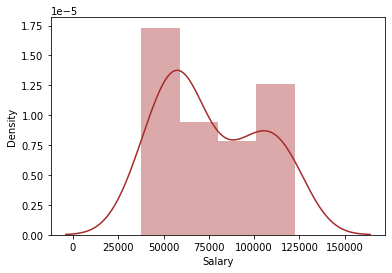

In [8]:
sns.distplot(salary_df['Salary'],color='brown');

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


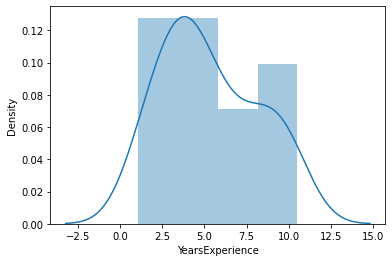

In [9]:
sns.distplot(salary_df.YearsExperience)

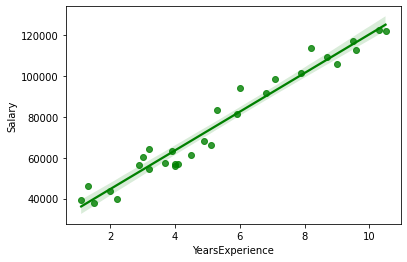

In [10]:
sns.regplot(x='YearsExperience',y='Salary',data=salary_df,color='green');

In [11]:
#splitting the datset
X=np.array(salary_df['YearsExperience']).reshape(-1,1)
Y=np.array(salary_df['Salary']).reshape(-1,1)

In [12]:
Model = LinearRegression()
Model.fit(X,Y)

LinearRegression()

In [13]:
predicted=Model.predict(X)

In [14]:
from sklearn.metrics import mean_absolute_error
MAE=metrics.mean_absolute_error(Y,predicted)
print("Mean absolute error is {}".format(MAE))

Mean absolute error is 4644.2012894435375


In [15]:
from sklearn.metrics import r2_score
Rsquare= r2_score(Y,predicted)
print("The Rsquare value is {}".format(Rsquare))

The Rsquare value is 0.9569566641435086


In [16]:
print("The intercept value is {}".format(Model.intercept_))

The intercept value is [25792.20019867]


In [17]:
print("The slope value is{}".format(Model.coef_))

The slope value is[[9449.96232146]]


In [18]:
import statsmodels.formula.api as smf
model_smf=smf.ols('Salary~YearsExperience',data=salary_df).fit()
print(model_smf.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Wed, 27 Apr 2022   Prob (F-statistic):           1.14e-20
Time:                        13:15:07   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     

In [19]:
model_smf.tvalues,model_smf.pvalues

(Intercept          11.346940
 YearsExperience    24.950094
 dtype: float64, Intercept          5.511950e-12
 YearsExperience    1.143068e-20
 dtype: float64)

In [20]:
new_data=pd.Series([1.5,9,5,4,2])
pdata=pd.DataFrame(new_data,columns=["YearsExperiance"])
pdata

,YearsExperiance
0,1.5
1,9.0
2,5.0
3,4.0
4,2.0


In [21]:
Model.predict(pdata)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


array([[ 39967.14368085],
       [110841.86109176],
       [ 73042.01180594],
       [ 63592.04948449],
       [ 44692.12484158]])

In [22]:
x_log=np.log(X)
y_log=np.log(Y)

In [23]:
model1=LinearRegression()

In [24]:
model1.fit(x_log,y_log)

LinearRegression()

In [25]:
log_pred=model1.predict(x_log)

In [26]:
log_r2score=r2_score(y_log,log_pred)
print("The rsquare value after transforminh the variables into log is {}".format(log_r2score))


The rsquare value after transforminh the variables into log is 0.905215072581715


In [27]:
x_sq=X*X
y_sq=Y*Y
model2=LinearRegression()
model2.fit(x_sq,y_sq)

LinearRegression()

In [28]:
sq_pred=model2.predict(x_sq)
sq_r2core=r2_score(y_sq,sq_pred)
print("The rsquare value after transforminh the variables into squares is {}".format(sq_r2core))


The rsquare value after transforminh the variables into squares is 0.9540880842110778


In [29]:
x_sqrt=np.sqrt(X)
y_sqrt=np.sqrt(Y)

In [30]:
model3=LinearRegression()
model3.fit(x_sqrt,y_sqrt)

LinearRegression()

In [31]:
sqrt_pred=model3.predict(x_sqrt)

In [32]:
sqrt_r2core=r2_score(y_sqrt,sqrt_pred)
print("The rsquare value after transforminh the variables into squares is {}".format(sqrt_r2core))


The rsquare value after transforminh the variables into squares is 0.9419490138976825


In [33]:
pd.DataFrame({"models":['model','model(Log)','model(squre)','model(squareroot)'],"rsquare value":[Rsquare,log_r2score,sq_r2core,sqrt_r2core]})


,models,rsquare value
0,model,0.956957
1,model(Log),0.905215
2,model(squre),0.954088
3,model(squareroot),0.941949
